# Convert JSON to Pandas DF 33 peaks

Date: August 2019 | Author: Hilary Goh | Team: Woodside, Intelligent Assets & Robotics

---

Only using data from one pump
* cleanest signal
* Ground truth available
* ON & OFF state
* assume UTC time for both time series?

###### OPAM:1473 | FLOC: AU21.A6424AP7 | Thing ID: 00:80:00:00:04:01:21:C0 
###### PHD tag: PGP.64FI491.DACA.PV | Group: Membrane Biological Reactor | GTm: m3/hr

---

###### Data source:
* saved json from motorjul31_110839C0ON.ipynb
* var timestart="2019-07-31 00:06:00"
* var timeend="2019-07-31 11:30:00"
* no filtering - full raw dataset
* V2 at 30min sampling resolution
* GT at 1min sampling resolution


---

###### Import libraries and modules

In [271]:
%matplotlib inline
import pandas as pd
import pandas_profiling
import numpy as np
import matplotlib.pyplot as plt
import json
import seaborn as sb
sb.set()
#sb.set_style('whitegrid')

## 1. Convert JSON into pandas dataframe
* check timestamp conversion
* check array (correct columns, correct index)
* split pandas dataframe
* check keys

In [184]:
with open('motorjul31_110839C0ON.json','r') as fp: #open the file for viewing, not using pandas just yet
     ON = json.load(fp)

In [185]:
with open('motorjul31_083838C0OFF.json','r') as fp: 
     OFF = json.load(fp)

In [186]:
ON.keys() #check for dictionaries and lists

dict_keys(['id', 'start', 'end', 'V1', 'V2', 'V3', 'T', 'gotData', 'groundtruth', 'sensorId', 'sensorType', 'QUUUUuery'])

In [187]:
ON['V3']['data']['ts'][0:10] #check timestamp format for vib 3
# readings every half hour, all 33 peaks

['2019-7-31 11:08:39',
 '2019-7-31 11:08:39',
 '2019-7-31 11:08:39',
 '2019-7-31 11:08:39',
 '2019-7-31 11:08:39',
 '2019-7-31 11:08:39',
 '2019-7-31 11:08:39',
 '2019-7-31 11:08:39',
 '2019-7-31 11:08:39',
 '2019-7-31 11:08:39']

In [188]:
OFF.keys()

dict_keys(['id', 'start', 'end', 'V1', 'V2', 'V3', 'T', 'gotData', 'groundtruth', 'sensorId', 'sensorType', 'QUUUUuery'])

In [189]:
OFF['V3']['data']['ts'][0:10] 
# readings every half hour, all 33 peaks

['2019-7-31 08:38:38',
 '2019-7-31 08:38:38',
 '2019-7-31 08:38:38',
 '2019-7-31 08:38:38',
 '2019-7-31 08:38:38',
 '2019-7-31 08:38:38',
 '2019-7-31 08:38:38',
 '2019-7-31 08:38:38',
 '2019-7-31 08:38:38',
 '2019-7-31 08:38:38']

---

###### Transform each feature from dict/list to table
* need to do each feature
* so we can merge into one table
* match and fill timestamps

In [190]:
tsV3ON =pd.to_datetime(ON['V3']['data']['ts'])

In [191]:
tsV3ON[0:5]

DatetimeIndex(['2019-07-31 11:08:39', '2019-07-31 11:08:39',
               '2019-07-31 11:08:39', '2019-07-31 11:08:39',
               '2019-07-31 11:08:39'],
              dtype='datetime64[ns]', freq=None)

In [192]:
tsV3OFF =pd.to_datetime(OFF['V3']['data']['ts'])

In [193]:
tsV3OFF[0:5]

DatetimeIndex(['2019-07-31 08:38:38', '2019-07-31 08:38:38',
               '2019-07-31 08:38:38', '2019-07-31 08:38:38',
               '2019-07-31 08:38:38'],
              dtype='datetime64[ns]', freq=None)

###### Need to get amps and freq for V3 (probe on motor)

In [194]:
ampV3ON = np.array(ON['V3']['data']['amp'])

In [195]:
ampV3OFF = np.array(OFF['V3']['data']['amp'])

In [196]:
ampV3ON[0:10] #check values

array([0.02741, 0.02742, 0.02745, 0.02745, 0.02873, 0.02924, 0.02944,
       0.02993, 0.03014, 0.0302 ])

In [197]:
ampV3OFF[0:10] #check values

array([0.02318, 0.02349, 0.0235 , 0.02355, 0.02372, 0.0238 , 0.02431,
       0.02466, 0.02478, 0.02498])

In [198]:
freqV3ON = np.array(ON['V3']['data']['freq'])

In [199]:
freqV3OFF = np.array(OFF['V3']['data']['freq'])

In [200]:
freqV3ON[0:10] #check values

array([ 892,  356,  692,  456,  967,  293,    1, 1129, 1330,  888])

In [201]:
freqV3OFF[0:10] #check values

array([ 430, 1530,    2,  157,    1,  168,  779,  443,  842, 1418])

###### Transpose

In [202]:
afV3ON  = np.vstack([ampV3ON, freqV3ON])
afV3ON.T.shape  # T for matrix transpose
# should be 33 rows and 2 columns

(33, 2)

In [203]:
afV3OFF  = np.vstack([ampV3OFF, freqV3OFF])
afV3OFF.T.shape  # T for matrix transpose

(33, 2)

###### Check pandas dataframe

In [204]:
V3ON_df = pd.DataFrame(afV3ON.T, columns = ['ampV3ON','freqV3ON'], index=tsV3ON)
V3ON_df = V3ON_df.sort_values(by = 'freqV3ON')
V3ON_df

,ampV3ON,freqV3ON
2019-07-31 11:08:39,0.02944,1.0
2019-07-31 11:08:39,0.03157,2.0
2019-07-31 11:08:39,0.09325,5.0
2019-07-31 11:08:39,0.10050,7.0
2019-07-31 11:08:39,0.05106,8.0
2019-07-31 11:08:39,0.05547,9.0
2019-07-31 11:08:39,0.04832,10.0
2019-07-31 11:08:39,0.03125,11.0
2019-07-31 11:08:39,0.03806,14.0
2019-07-31 11:08:39,0.04121,15.0


In [205]:
# create index, will use this to join two df's later

In [206]:
V3ON_df = V3ON_df.reset_index().rename(columns={'index':'timeON'})
V3ON_df

,timeON,ampV3ON,freqV3ON
0,2019-07-31 11:08:39,0.02944,1.0
1,2019-07-31 11:08:39,0.03157,2.0
2,2019-07-31 11:08:39,0.09325,5.0
3,2019-07-31 11:08:39,0.10050,7.0
4,2019-07-31 11:08:39,0.05106,8.0
5,2019-07-31 11:08:39,0.05547,9.0
6,2019-07-31 11:08:39,0.04832,10.0
7,2019-07-31 11:08:39,0.03125,11.0
8,2019-07-31 11:08:39,0.03806,14.0
9,2019-07-31 11:08:39,0.04121,15.0


In [207]:
V3OFF_df = pd.DataFrame(afV3OFF.T, columns = ['ampV3OFF','freqV3OFF'], index=tsV3OFF)
V3OFF_df = V3OFF_df.sort_values(by = 'freqV3OFF')
V3OFF_df

,ampV3OFF,freqV3OFF
2019-07-31 08:38:38,0.02372,1.0
2019-07-31 08:38:38,0.02350,2.0
2019-07-31 08:38:38,0.07258,5.0
2019-07-31 08:38:38,0.14007,7.0
2019-07-31 08:38:38,0.05014,9.0
2019-07-31 08:38:38,0.03454,11.0
2019-07-31 08:38:38,0.03233,14.0
2019-07-31 08:38:38,0.04130,15.0
2019-07-31 08:38:38,0.09480,18.0
2019-07-31 08:38:38,0.05719,20.0


In [208]:
V3OFF_df = V3OFF_df.reset_index().rename(columns={'index':'timeOFF'})
V3OFF_df

,timeOFF,ampV3OFF,freqV3OFF
0,2019-07-31 08:38:38,0.02372,1.0
1,2019-07-31 08:38:38,0.02350,2.0
2,2019-07-31 08:38:38,0.07258,5.0
3,2019-07-31 08:38:38,0.14007,7.0
4,2019-07-31 08:38:38,0.05014,9.0
5,2019-07-31 08:38:38,0.03454,11.0
6,2019-07-31 08:38:38,0.03233,14.0
7,2019-07-31 08:38:38,0.04130,15.0
8,2019-07-31 08:38:38,0.09480,18.0
9,2019-07-31 08:38:38,0.05719,20.0


---

###### Combine into one dataframe

In [209]:
C0V3 = V3ON_df.join(V3OFF_df, how = 'left')
C0V3

,timeON,ampV3ON,freqV3ON,timeOFF,ampV3OFF,freqV3OFF
0,2019-07-31 11:08:39,0.02944,1.0,2019-07-31 08:38:38,0.02372,1.0
1,2019-07-31 11:08:39,0.03157,2.0,2019-07-31 08:38:38,0.02350,2.0
2,2019-07-31 11:08:39,0.09325,5.0,2019-07-31 08:38:38,0.07258,5.0
3,2019-07-31 11:08:39,0.10050,7.0,2019-07-31 08:38:38,0.14007,7.0
4,2019-07-31 11:08:39,0.05106,8.0,2019-07-31 08:38:38,0.05014,9.0
5,2019-07-31 11:08:39,0.05547,9.0,2019-07-31 08:38:38,0.03454,11.0
6,2019-07-31 11:08:39,0.04832,10.0,2019-07-31 08:38:38,0.03233,14.0
7,2019-07-31 11:08:39,0.03125,11.0,2019-07-31 08:38:38,0.04130,15.0
8,2019-07-31 11:08:39,0.03806,14.0,2019-07-31 08:38:38,0.09480,18.0
9,2019-07-31 11:08:39,0.04121,15.0,2019-07-31 08:38:38,0.05719,20.0


In [210]:
C0V3.dtypes

timeON       datetime64[ns]
ampV3ON             float64
freqV3ON            float64
timeOFF      datetime64[ns]
ampV3OFF            float64
freqV3OFF           float64
dtype: object

---

## 2. Calculate delta values

want to see change in particular frequency

new columns --> calculation
* freqV3ON - freqV3OFF
* ampV3On - ampV3OFF

In [211]:
C0V3['freq_delta'] = C0V3.apply(lambda row: row.freqV3ON - row.freqV3OFF, axis = 1).abs()
C0V3['amp_delta'] = C0V3.apply(lambda row: row.ampV3ON - row.ampV3OFF, axis = 1).abs()
C0V3

,timeON,ampV3ON,freqV3ON,timeOFF,ampV3OFF,freqV3OFF,freq_delta,amp_delta
0,2019-07-31 11:08:39,0.02944,1.0,2019-07-31 08:38:38,0.02372,1.0,0.0,0.00572
1,2019-07-31 11:08:39,0.03157,2.0,2019-07-31 08:38:38,0.02350,2.0,0.0,0.00807
2,2019-07-31 11:08:39,0.09325,5.0,2019-07-31 08:38:38,0.07258,5.0,0.0,0.02067
3,2019-07-31 11:08:39,0.10050,7.0,2019-07-31 08:38:38,0.14007,7.0,0.0,0.03957
4,2019-07-31 11:08:39,0.05106,8.0,2019-07-31 08:38:38,0.05014,9.0,1.0,0.00092
5,2019-07-31 11:08:39,0.05547,9.0,2019-07-31 08:38:38,0.03454,11.0,2.0,0.02093
6,2019-07-31 11:08:39,0.04832,10.0,2019-07-31 08:38:38,0.03233,14.0,4.0,0.01599
7,2019-07-31 11:08:39,0.03125,11.0,2019-07-31 08:38:38,0.04130,15.0,4.0,0.01005
8,2019-07-31 11:08:39,0.03806,14.0,2019-07-31 08:38:38,0.09480,18.0,4.0,0.05674
9,2019-07-31 11:08:39,0.04121,15.0,2019-07-31 08:38:38,0.05719,20.0,5.0,0.01598


___

In [212]:
pandas_profiling.ProfileReport(C0V3) # see if this works, might provide warnings & labels

Number of variables,8
Number of observations,33
Total Missing (%),0.0%
Total size in memory,2.1 KiB
Average record size in memory,66.4 B
Numeric,5
Categorical,0
Boolean,0
Date,0
Text (Unique),0
Rejected,3


Next steps

### Frequency plots

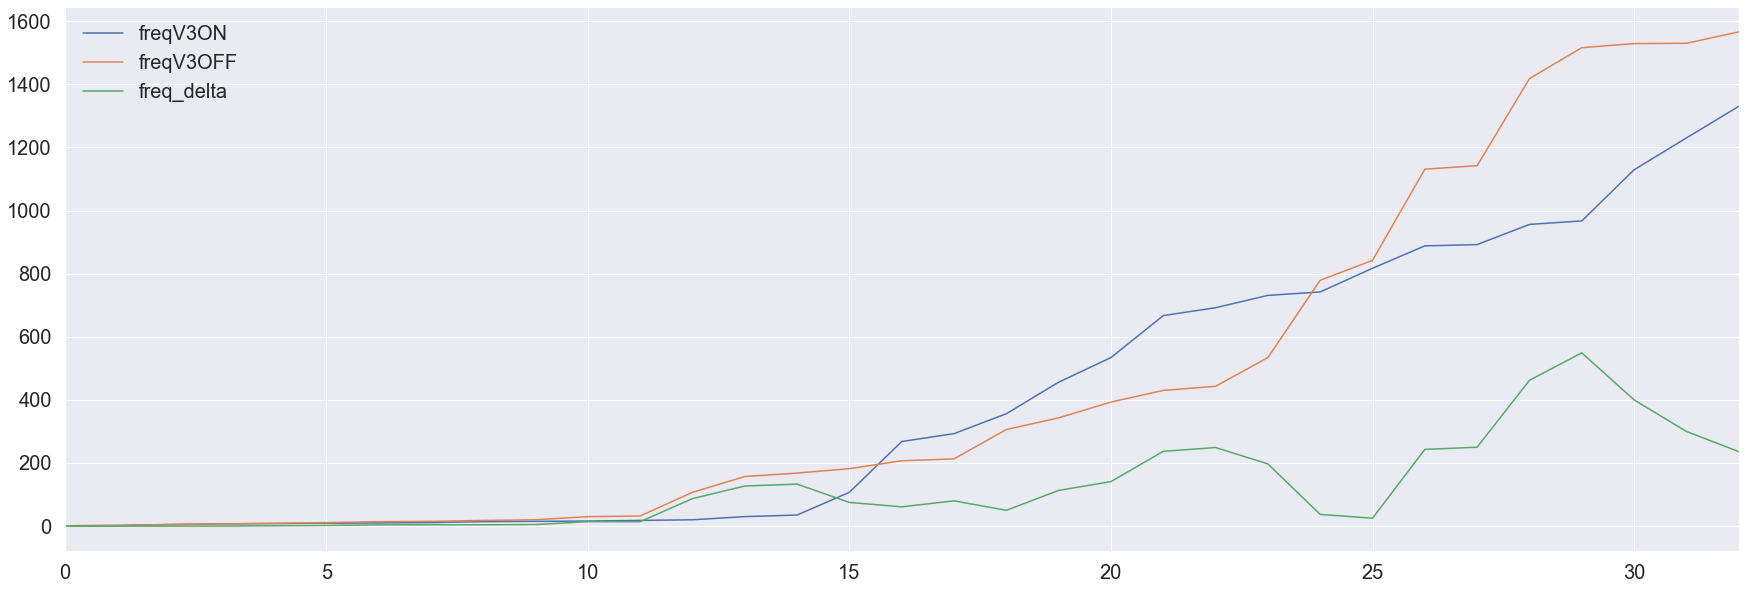

In [278]:
C0V3[['freqV3ON', 'freqV3OFF', 'freq_delta']].plot(figsize=(30,10))
plt.legend(fontsize = 20)
plt.tick_params(labelsize = 20)
# double click image to zoom in

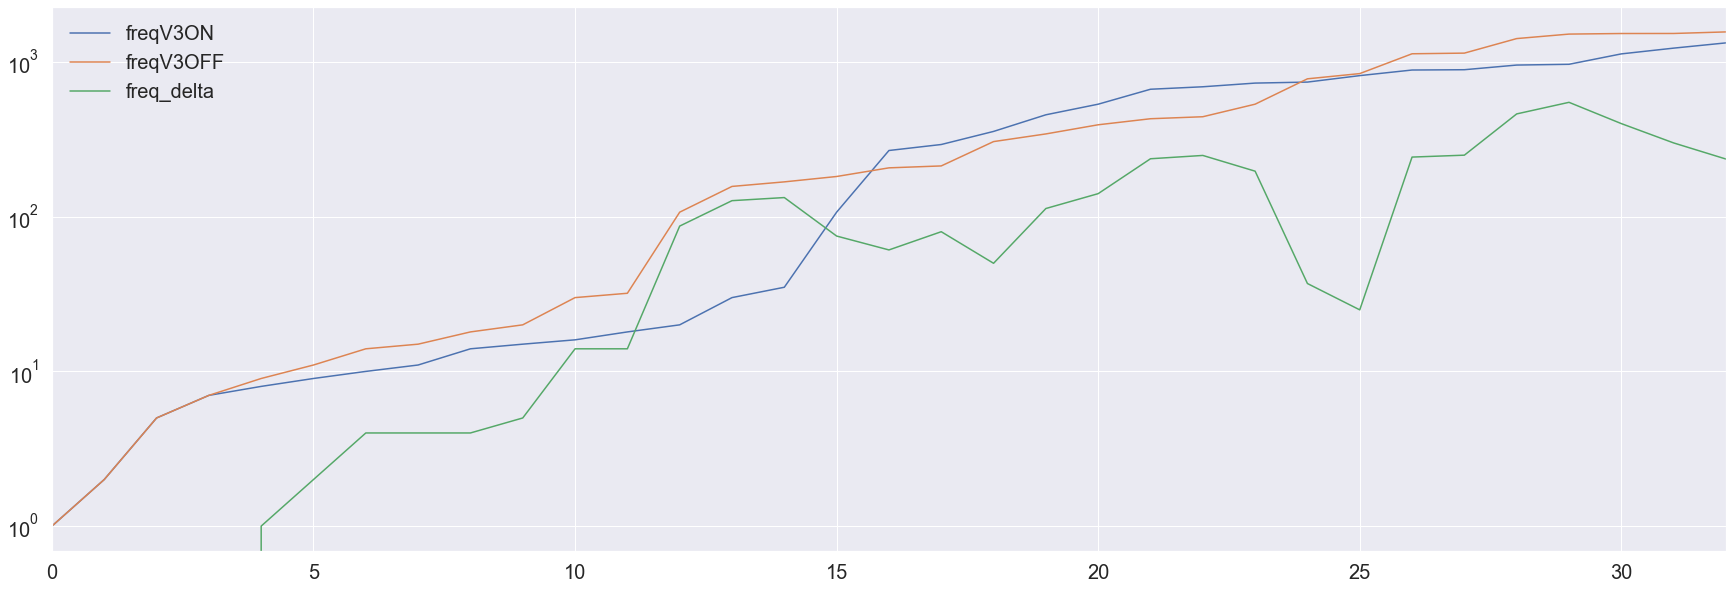

In [277]:
C0V3[['freqV3ON', 'freqV3OFF', 'freq_delta']].plot(figsize=(30,10))
plt.legend(fontsize = 20)
plt.tick_params(labelsize = 20)
plt.yscale('log')
# double click image to zoom in

### Amplitude plots

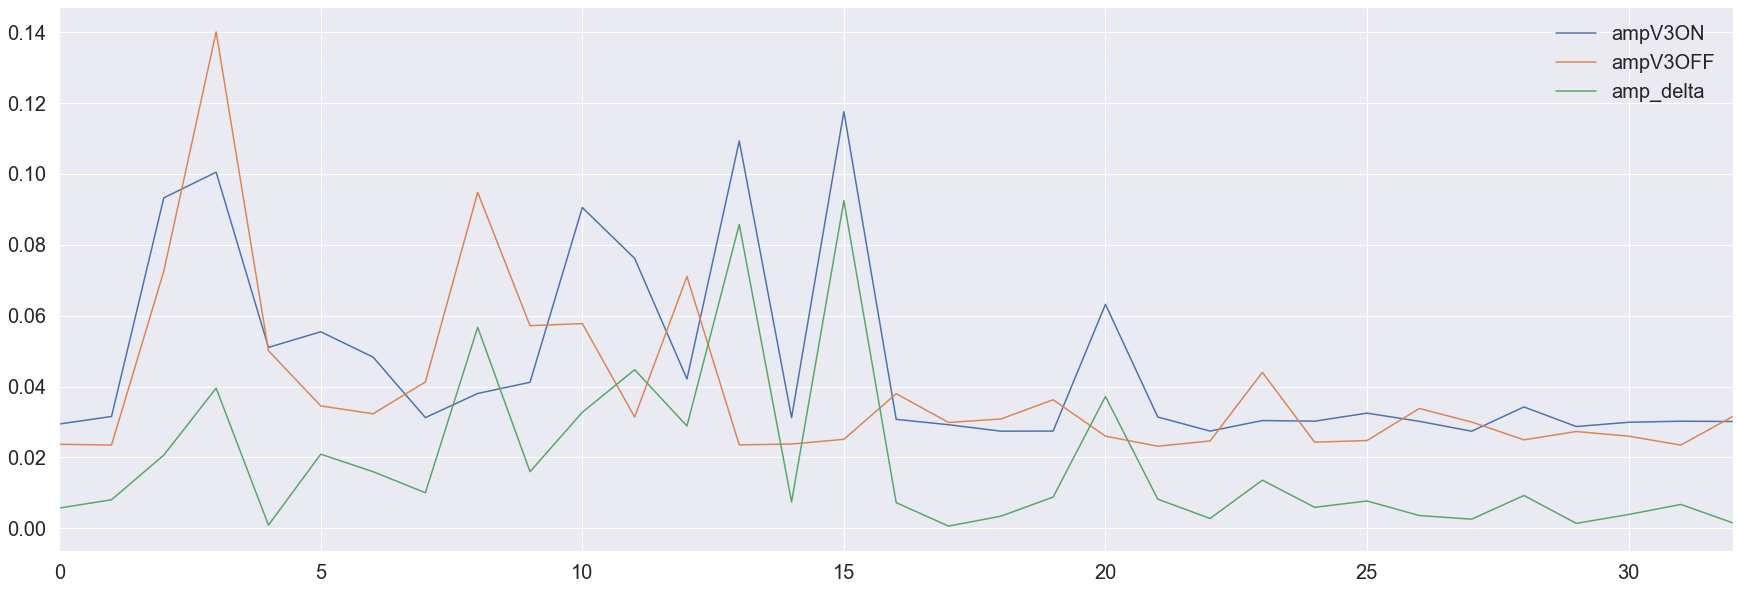

In [273]:
C0V3[['ampV3ON', 'ampV3OFF','amp_delta']].plot(figsize=(30,10))
plt.legend(fontsize = 20)
plt.tick_params(labelsize = 20)

###### Export to CSV

In [227]:
export_csv = C0V3.to_csv('C0V3jul31.csv')